# Review 1B Key
by **Professor Throckmorton**  
for *Time Series Econometrics*  
W&amp;M ECON 408/PUBP 616  
<a href="review-1B-key.slides.html">Slides</a>

## 1)
- Read U.S. Industrial Production: Total Index (`IPB50001N`) from FRED.
- Resample/reindex the data to a quarterly frequency using the value for the last month of each quarter.
- Print the original data and compare it to the resampled/reindexed data to verify it is correct.

In [1]:
# Libraries
from fredapi import Fred
import pandas as pd
# Read data
fred_api_key = pd.read_csv('fred_api_key.txt', header=None)
fred = Fred(api_key=fred_api_key.iloc[0,0])
data = fred.get_series('IPB50001N').to_frame(name='IP')
print(data.tail(3))
# Resample/reindex to quarterly frequency
data = data.resample('QE').last()
# Print data
print(f'number of rows/quarters = {len(data)}')
print(data.tail(3))

                  IP
2025-04-01  102.6547
2025-05-01  102.7865
2025-06-01  105.2800
number of rows/quarters = 426
                  IP
2024-12-31  102.5835
2025-03-31  104.2163
2025-06-30  105.2800


## 2)
- Why is this data not stationary?
- Use appropriate transformations to remove the non-stationarity and plot the series.
- Correctly and completely label the plot.

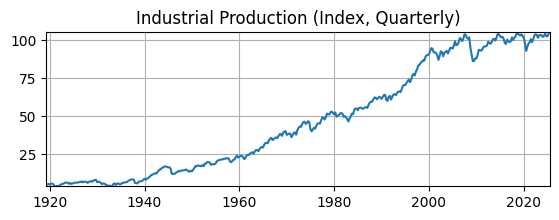

In [2]:
# Plotting
import matplotlib.pyplot as plt
# Plot
fig, ax = plt.subplots(figsize=(6.5,2));
ax.plot(data.IP);
ax.set_title('Industrial Production (Index, Quarterly)');
ax.grid(); ax.autoscale(tight=True)

This data is non-stationary because it is seasonal over the year and it has an exponential time trend.

In [3]:
# Scientific computing
import numpy as np
# Transform data
#    Take log
data['logIP'] = np.log(data.IP)
#    Take difference
data['dlogIP'] = 100*(data.logIP.diff(4))

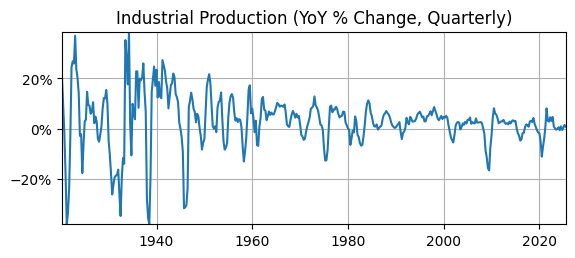

In [4]:
# Plot
fig, ax = plt.subplots(figsize=(6.5,2.5));
ax.plot(data.dlogIP);
ax.set_title('Industrial Production (YoY % Change, Quarterly)');
ax.yaxis.set_major_formatter('{x:.0f}%')
ax.grid(); ax.autoscale(tight=True)

Time varying volatility indicates this is non-stationary data.

## 3)
- Plot the autocorrelation function of the transformed data.
- Is it stationary? Why or why not?

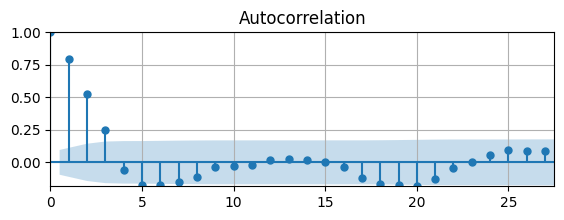

In [5]:
#   Auto-correlation function
from statsmodels.graphics.tsaplots import plot_acf as acf
# Plot Autocorrelation Function
fig, ax = plt.subplots(figsize=(6.5,2))
acf(data.dlogIP.dropna(),ax)
ax.grid(); ax.autoscale(tight=True)

- ACF is signifcant at long lags, doesn't clearly taper to zero
- might be non-stationary
- First 3 lags are remarkable

## 4)
- Conduct a unit root test of the transformed data.
- Is it stationary?  Why or why not?

In [6]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
# Function to organize ADF test results
def adf_test(data):
    keys = ['Test Statistic','p-value','# of Lags','# of Obs']
    values = adfuller(data)
    test = pd.DataFrame.from_dict(dict(zip(keys,values[0:4])),
                                  orient='index',columns=[data.name])
    return test
adf_test(data.dlogIP.dropna())

dlogIP
Test Statistic -5.803906e+00
p-value         4.563453e-07
# of Lags       1.500000e+01
# of Obs        4.060000e+02

- Null hypothesis: data has unit root
- p-value near zero, so reject the null
- Unit root test says data is probably stationary

## 5)
If you were to pick a parsimonious AR model (i.e., the number of lags is less than 5) to fit the transformed data, what lag would you pick? Why?

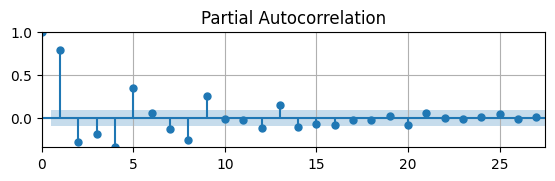

In [7]:
# Partial auto-correlation function
from statsmodels.graphics.tsaplots import plot_pacf as pacf
# Plot Autocorrelation Function
fig, ax = plt.subplots(figsize=(6.5,1.5))
pacf(data.dlogIP.dropna(),ax)
ax.grid(); ax.autoscale(tight=True);

- PACF is signficantly different from zero for first 5 lags
- Stops being signficant for lag 6

## 6)
- Given your last answer, estimate an AR model given the transformed quarterly data.
- Interpret the results.

In [8]:
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA
# Define model
mod = ARIMA(data.dlogIP,order=(5,0,0))
# Estimate model
res = mod.fit()
summary = res.summary()
# Print summary tables
tab0 = summary.tables[0].as_html()
tab1 = summary.tables[1].as_html()
tab2 = summary.tables[2].as_html()
#print(tab0); print(tab1); print(tab2)

<table class="simpletable">
<tr>
  <th>Dep. Variable:</th>        <td>dlogIP</td>      <th>  No. Observations:  </th>    <td>425</td>   
</tr>
<tr>
  <th>Model:</th>            <td>ARIMA(5, 0, 0)</td>  <th>  Log Likelihood     </th> <td>-1298.814</td>
</tr>
</table>
<table class="simpletable">
<tr>
     <td></td>       <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>  <td>    2.9265</td> <td>    0.975</td> <td>    3.002</td> <td> 0.003</td> <td>    1.016</td> <td>    4.837</td>
</tr>
<tr>
  <th>ar.L1</th>  <td>    1.0243</td> <td>    0.031</td> <td>   32.647</td> <td> 0.000</td> <td>    0.963</td> <td>    1.086</td>
</tr>
<tr>
  <th>ar.L2</th>  <td>   -0.1735</td> <td>    0.042</td> <td>   -4.163</td> <td> 0.000</td> <td>   -0.255</td> <td>   -0.092</td>
</tr>
<tr>
  <th>ar.L3</th>  <td>    0.1902</td> <td>    0.035</td> <td>    5.505</td> <td> 0.000</td> <td>    0.123</td> <td>    0.258</td>
</tr>
<tr>
  <th>ar.L4</th>  <td>   -0.6642</td> <td>    0.029</td> <td>  -22.871</td> <td> 0.000</td> <td>   -0.721</td> <td>   -0.607</td>
</tr>
<tr>
  <th>ar.L5</th>  <td>    0.3486</td> <td>    0.025</td> <td>   13.773</td> <td> 0.000</td> <td>    0.299</td> <td>    0.398</td>
</tr>
<tr>
  <th>sigma2</th> <td>   27.8385</td> <td>    0.912</td> <td>   30.511</td> <td> 0.000</td> <td>   26.050</td> <td>   29.627</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Heteroskedasticity (H):</th> <td>0.05</td> <th>  Skew:              </th>  <td>0.34</td>  
</tr>
<tr>
  <th>Prob(H) (two-sided):</th>    <td>0.00</td> <th>  Kurtosis:          </th>  <td>13.72</td> 
</tr>
</table>

- All the AR coefficients are significantly different than zero
- Residuals have a lot of kurtosis, so maybe AR model isn't the best choice